# 1. Llegir imatge


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import matplotlib.pyplot as plt # importem el modul pyplot de la llibreria de representacio grafica matplotlib i l'anomenem plt per comoditat
import numpy as np # importem la llibreria de manipulacio de vectors i matrius numpy
from skimage.io import imread # importem la funcio imread (llegir imatge) del modul io (input-output) de les llibreries de processment d'imatges skimage


# Llegim la imatge del google drive:
I = imread('/content/drive/MyDrive/TR/CAPSULA_ENDOSCOPICA/test_images/image1.jpg')

Mirem les dimensions de la imatge (files, columnes i canals de color)

In [6]:
I.shape

(576, 576, 3)

Mirem quants pixels te la imatge

In [7]:
I.shape[0]*I.shape[1]

331776

Consultem el tipus de dada dekl pixel. uint8 vold dir unsigned integer de 8 bits, és a dir, enters sense signe (positius) de 8 bits. Com que amb 8 bits podem anar de 0 fins a 2^8-1 = 255. Amb 1 bit només podem tenir valors de pixel 0 o 1. Amb dos bits podem tenir quatre vsalors diferents: 0,1,2,3.

In [ ]:
I.dtype

dtype('uint8')

Mostrem la imatge original en color

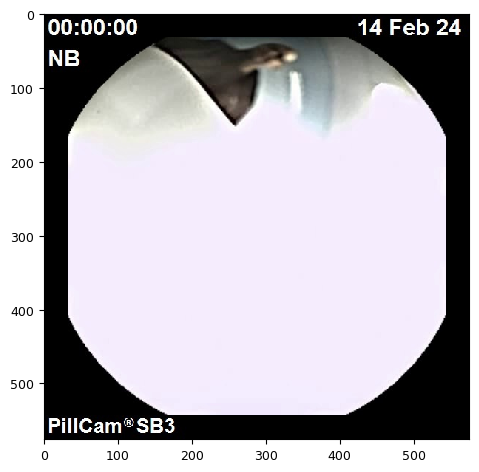

In [ ]:
from skimage.io import imshow

imshow(I)

en aquesta imatge tenim una imatge de 576 files, 576 columnes i 3 canals de color (RGB)

In [ ]:
I.shape

(576, 576, 3)

# 2. Funció per segmentar la imatge RGB  

La funció té com a entrada la imatge RGB I i retorna la imatge segmentada L

In [10]:
import numpy as np
from sklearn.cluster import KMeans # carregem la funció k means de les llibreries d'intel.ligencia artificial sklearn per fer l'agrupament de pixels

X = np.reshape(I,(I.shape[0]*I.shape[1],I.shape[2])) # redimensionem la imatge d'entrada (NX,NY,3) i la posem com (NX*NY,3) = (numero de pixels, 3)
labels = KMeans(n_clusters=4).fit_predict(X) # apliquem l'algorisme d'agrupament per agrupar els pixels en 4 grups (clusters)
L = np.reshape(labels,(I.shape[0],I.shape[1])) # redimensionam el resultat de kmeans a les dimensions originals de la imatge (NX,NY,3). L es una imatge de les mateixes dimensions que I.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# 3. grafiquem la imatge original i el resultat de la segmentació

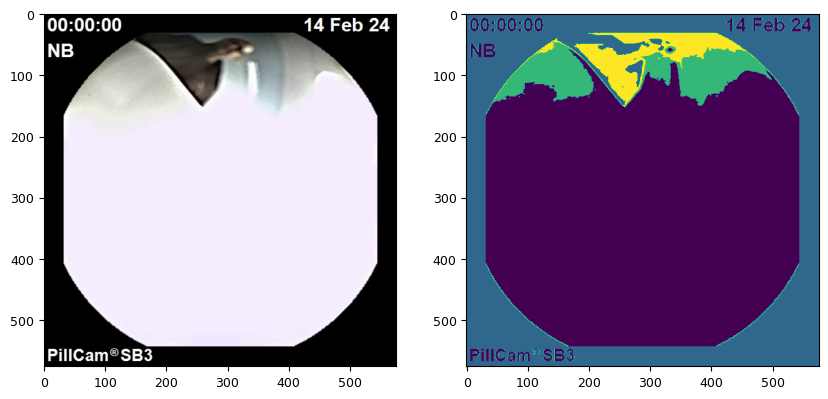

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10)) # Definim una nova figura de tamany (15,15)
ax1 = fig.add_subplot(121) #definim una estructura de ssubpanells amb 1 fila i 2 columnes i sel.leccionem el primer subpanell
ax1 = plt.imshow(I) # representem la imatge I al primer panell (imshow = image show)

ax2 = fig.add_subplot(122) # definim una estructura de ssubpanells amb 1 fila i 2 columnes i sel.leccionem el segon subpanell
ax2 = plt.imshow(L) # representem la imatge I al segon panell

In [ ]:
L.shape #consultem les dimensions de la matriu L (files, columnes)

(576, 576)

In [ ]:
np.unique(L) # funcio per llistar els valors que apareixen a una matriu L

array([0, 1, 2, 3], dtype=int32)